## Crime Location ##

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from IPython.display import IFrame
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

In [2]:
url = 'https://seattlecitygis.maps.arcgis.com/apps/instant/lookup/index.html?appid=cf1b0198a1b94db5a8152c9f93232fa5'

In [3]:
IFrame(url, width='100%', height=500)

## Beat ##

In [4]:
df_beat = pd.read_csv("preprocessed_data_location.csv")
df_sector = df_beat
df_beat

,Crime Against Category,Offense,Sector,Beat,MCPP,Time,Day,Year
0,3,Drug/Narcotic Violations,Q,Q1,MAGNOLIA,10:10:00,2,2020
1,2,Theft of Motor Vehicle Parts or Accessories,J,J3,ROOSEVELT/RAVENNA,08:00:00,0,2020
2,2,Robbery,U,U3,ROOSEVELT/RAVENNA,20:30:00,6,2020
3,2,Destruction/Damage/Vandalism of Property,Q,Q1,MAGNOLIA,01:17:00,2,2020
4,3,Driving Under the Influence,B,B2,BALLARD SOUTH,00:51:21,2,2020
...,...,...,...,...,...,...,...,...
1034982,2,Motor Vehicle Theft,F,F1,PIGEON POINT,01:00:00,5,2013
1034983,2,Motor Vehicle Theft,Q,Q3,QUEEN ANNE,11:00:00,2,2013
1034984,2,Shoplifting,U,U1,ROOSEVELT/RAVENNA,15:04:00,1,2012
1034985,2,Shoplifting,M,M3,DOWNTOWN COMMERCIAL,16:59:00,6,2010


In [5]:
df_beat["Year"] = df_beat["Year"].astype('str').astype('int64')
df_beat = df_beat[df_beat["Year"] >= 2020]

In [6]:
df_beat = df_beat[~df_beat['Beat'].isin(df_beat['Beat'].value_counts().lt(5000).pipe(lambda s: s[s].index))]

In [7]:
pd.options.mode.chained_assignment = None
df_beat["Time"] = df_beat["Time"].astype("category").cat.codes
df_beat["Day"] = df_beat["Day"].astype("category").cat.codes
df_beat["Year"] = df_beat["Year"].astype("category").cat.codes
df_beat["Sector"] = df_beat["Sector"].astype("category").cat.codes
#df["Beat"] = df["Beat"].astype("category").cat.codes
df_beat["MCPP"] = df_beat["MCPP"].astype("category").cat.codes
df_beat["Offense"] = df_beat["Offense"].astype("category").cat.codes

In [8]:
df_beat

,Crime Against Category,Offense,Sector,Beat,MCPP,Time,Day,Year
2,2,39,8,U3,25,1420,6,0
4,3,11,0,B2,2,64,2,0
8,3,11,4,L2,21,1308,1,0
15,2,7,2,E1,4,1393,1,0
18,2,41,8,U2,28,1052,1,0
...,...,...,...,...,...,...,...,...
1034960,2,29,9,W2,0,152,5,3
1034961,2,29,4,L2,21,1533,1,3
1034967,2,29,0,B1,2,1093,4,2
1034970,2,45,3,K3,6,35,3,2


In [9]:
X_location = df_beat.drop("Beat", axis = 1)

#Target Variable
y_location = df_beat["Beat"]

In [10]:
X_location_train, X_location_test, y_location_train, y_location_test = train_test_split(X_location, y_location, random_state = 1)

In [11]:
SS = StandardScaler()
X_location_train = SS.fit_transform(X_location_train)
X_location_test = SS.transform(X_location_test)

In [12]:
sm = SMOTE(random_state = 1)
X_location_train, y_location_train = sm.fit_sample(X_location_train, y_location_train)

### CatBoost Model ###

In [13]:
CBC = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
)

In [14]:
CBC.fit(
    X_location_train, y_location_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.099858
0:	learn: 1.9885799	total: 240ms	remaining: 3m 59s
1:	learn: 1.6782583	total: 330ms	remaining: 2m 44s
2:	learn: 1.4380550	total: 418ms	remaining: 2m 18s
3:	learn: 1.2776845	total: 504ms	remaining: 2m 5s
4:	learn: 1.1539263	total: 593ms	remaining: 1m 58s
5:	learn: 1.0562799	total: 681ms	remaining: 1m 52s
6:	learn: 0.9729072	total: 768ms	remaining: 1m 48s
7:	learn: 0.9051014	total: 852ms	remaining: 1m 45s
8:	learn: 0.8513517	total: 941ms	remaining: 1m 43s
9:	learn: 0.8012193	total: 1.03s	remaining: 1m 42s
10:	learn: 0.7577723	total: 1.12s	remaining: 1m 40s
11:	learn: 0.7197197	total: 1.21s	remaining: 1m 39s
12:	learn: 0.6842889	total: 1.29s	remaining: 1m 38s
13:	learn: 0.6542866	total: 1.38s	remaining: 1m 36s
14:	learn: 0.6268442	total: 1.47s	remaining: 1m 36s
15:	learn: 0.6016663	total: 1.55s	remaining: 1m 35s
16:	learn: 0.5801678	total: 1.64s	remaining: 1m 34s
17:	learn: 0.5617045	total: 1.72s	remaining: 1m 33s
18:	learn: 0.5443601	total: 1.8s	remaining: 1

157:	learn: 0.3341438	total: 13.8s	remaining: 1m 13s
158:	learn: 0.3339785	total: 13.9s	remaining: 1m 13s
159:	learn: 0.3338242	total: 14s	remaining: 1m 13s
160:	learn: 0.3337054	total: 14.1s	remaining: 1m 13s
161:	learn: 0.3335953	total: 14.1s	remaining: 1m 13s
162:	learn: 0.3335121	total: 14.2s	remaining: 1m 13s
163:	learn: 0.3333991	total: 14.3s	remaining: 1m 12s
164:	learn: 0.3332622	total: 14.4s	remaining: 1m 12s
165:	learn: 0.3331854	total: 14.5s	remaining: 1m 12s
166:	learn: 0.3330605	total: 14.6s	remaining: 1m 12s
167:	learn: 0.3328789	total: 14.7s	remaining: 1m 12s
168:	learn: 0.3327560	total: 14.7s	remaining: 1m 12s
169:	learn: 0.3326662	total: 14.8s	remaining: 1m 12s
170:	learn: 0.3325867	total: 14.9s	remaining: 1m 12s
171:	learn: 0.3324723	total: 15s	remaining: 1m 12s
172:	learn: 0.3324181	total: 15.1s	remaining: 1m 12s
173:	learn: 0.3322649	total: 15.2s	remaining: 1m 11s
174:	learn: 0.3321623	total: 15.3s	remaining: 1m 11s
175:	learn: 0.3320759	total: 15.3s	remaining: 1m 1

318:	learn: 0.3225388	total: 27.3s	remaining: 58.4s
319:	learn: 0.3224814	total: 27.4s	remaining: 58.3s
320:	learn: 0.3224369	total: 27.5s	remaining: 58.2s
321:	learn: 0.3223994	total: 27.6s	remaining: 58.1s
322:	learn: 0.3223521	total: 27.7s	remaining: 58s
323:	learn: 0.3222955	total: 27.8s	remaining: 57.9s
324:	learn: 0.3222544	total: 27.8s	remaining: 57.8s
325:	learn: 0.3221851	total: 27.9s	remaining: 57.7s
326:	learn: 0.3221541	total: 28s	remaining: 57.6s
327:	learn: 0.3220801	total: 28.1s	remaining: 57.6s
328:	learn: 0.3220145	total: 28.2s	remaining: 57.5s
329:	learn: 0.3219832	total: 28.3s	remaining: 57.4s
330:	learn: 0.3219418	total: 28.3s	remaining: 57.3s
331:	learn: 0.3218835	total: 28.4s	remaining: 57.2s
332:	learn: 0.3218341	total: 28.5s	remaining: 57.1s
333:	learn: 0.3217833	total: 28.6s	remaining: 57s
334:	learn: 0.3217119	total: 28.7s	remaining: 56.9s
335:	learn: 0.3216793	total: 28.8s	remaining: 56.8s
336:	learn: 0.3216012	total: 28.8s	remaining: 56.7s
337:	learn: 0.3215

478:	learn: 0.3158246	total: 40.8s	remaining: 44.4s
479:	learn: 0.3157696	total: 40.9s	remaining: 44.3s
480:	learn: 0.3157291	total: 41s	remaining: 44.2s
481:	learn: 0.3156733	total: 41.1s	remaining: 44.1s
482:	learn: 0.3156288	total: 41.1s	remaining: 44s
483:	learn: 0.3155841	total: 41.2s	remaining: 44s
484:	learn: 0.3155490	total: 41.3s	remaining: 43.9s
485:	learn: 0.3155065	total: 41.4s	remaining: 43.8s
486:	learn: 0.3154605	total: 41.5s	remaining: 43.7s
487:	learn: 0.3154335	total: 41.6s	remaining: 43.6s
488:	learn: 0.3154053	total: 41.6s	remaining: 43.5s
489:	learn: 0.3153701	total: 41.7s	remaining: 43.4s
490:	learn: 0.3153195	total: 41.8s	remaining: 43.4s
491:	learn: 0.3152649	total: 41.9s	remaining: 43.3s
492:	learn: 0.3152110	total: 42s	remaining: 43.2s
493:	learn: 0.3151690	total: 42.1s	remaining: 43.1s
494:	learn: 0.3151420	total: 42.2s	remaining: 43s
495:	learn: 0.3150944	total: 42.2s	remaining: 42.9s
496:	learn: 0.3150620	total: 42.3s	remaining: 42.8s
497:	learn: 0.3150358	

639:	learn: 0.3103178	total: 54.4s	remaining: 30.6s
640:	learn: 0.3102813	total: 54.5s	remaining: 30.5s
641:	learn: 0.3102571	total: 54.6s	remaining: 30.4s
642:	learn: 0.3102241	total: 54.6s	remaining: 30.3s
643:	learn: 0.3101921	total: 54.7s	remaining: 30.3s
644:	learn: 0.3101739	total: 54.8s	remaining: 30.2s
645:	learn: 0.3101336	total: 54.9s	remaining: 30.1s
646:	learn: 0.3100916	total: 55s	remaining: 30s
647:	learn: 0.3100458	total: 55.1s	remaining: 29.9s
648:	learn: 0.3100186	total: 55.1s	remaining: 29.8s
649:	learn: 0.3100044	total: 55.2s	remaining: 29.7s
650:	learn: 0.3099739	total: 55.3s	remaining: 29.7s
651:	learn: 0.3099446	total: 55.4s	remaining: 29.6s
652:	learn: 0.3099148	total: 55.5s	remaining: 29.5s
653:	learn: 0.3098669	total: 55.6s	remaining: 29.4s
654:	learn: 0.3098575	total: 55.6s	remaining: 29.3s
655:	learn: 0.3098034	total: 55.7s	remaining: 29.2s
656:	learn: 0.3097749	total: 55.8s	remaining: 29.1s
657:	learn: 0.3097473	total: 55.9s	remaining: 29.1s
658:	learn: 0.30

799:	learn: 0.3058823	total: 1m 7s	remaining: 17s
800:	learn: 0.3058469	total: 1m 7s	remaining: 16.9s
801:	learn: 0.3058188	total: 1m 8s	remaining: 16.8s
802:	learn: 0.3057918	total: 1m 8s	remaining: 16.7s
803:	learn: 0.3057788	total: 1m 8s	remaining: 16.6s
804:	learn: 0.3057620	total: 1m 8s	remaining: 16.5s
805:	learn: 0.3057511	total: 1m 8s	remaining: 16.5s
806:	learn: 0.3057279	total: 1m 8s	remaining: 16.4s
807:	learn: 0.3056908	total: 1m 8s	remaining: 16.3s
808:	learn: 0.3056780	total: 1m 8s	remaining: 16.2s
809:	learn: 0.3056484	total: 1m 8s	remaining: 16.1s
810:	learn: 0.3056275	total: 1m 8s	remaining: 16s
811:	learn: 0.3056072	total: 1m 8s	remaining: 16s
812:	learn: 0.3055789	total: 1m 9s	remaining: 15.9s
813:	learn: 0.3055546	total: 1m 9s	remaining: 15.8s
814:	learn: 0.3055341	total: 1m 9s	remaining: 15.7s
815:	learn: 0.3055281	total: 1m 9s	remaining: 15.6s
816:	learn: 0.3055086	total: 1m 9s	remaining: 15.5s
817:	learn: 0.3054803	total: 1m 9s	remaining: 15.4s
818:	learn: 0.3054

957:	learn: 0.3022451	total: 1m 21s	remaining: 3.57s
958:	learn: 0.3022378	total: 1m 21s	remaining: 3.48s
959:	learn: 0.3022173	total: 1m 21s	remaining: 3.4s
960:	learn: 0.3021894	total: 1m 21s	remaining: 3.31s
961:	learn: 0.3021554	total: 1m 21s	remaining: 3.23s
962:	learn: 0.3020944	total: 1m 21s	remaining: 3.14s
963:	learn: 0.3020716	total: 1m 21s	remaining: 3.06s
964:	learn: 0.3020426	total: 1m 21s	remaining: 2.97s
965:	learn: 0.3020140	total: 1m 22s	remaining: 2.89s
966:	learn: 0.3019906	total: 1m 22s	remaining: 2.8s
967:	learn: 0.3019717	total: 1m 22s	remaining: 2.72s
968:	learn: 0.3019490	total: 1m 22s	remaining: 2.63s
969:	learn: 0.3019260	total: 1m 22s	remaining: 2.55s
970:	learn: 0.3018998	total: 1m 22s	remaining: 2.46s
971:	learn: 0.3018753	total: 1m 22s	remaining: 2.38s
972:	learn: 0.3018664	total: 1m 22s	remaining: 2.29s
973:	learn: 0.3018435	total: 1m 22s	remaining: 2.21s
974:	learn: 0.3018096	total: 1m 22s	remaining: 2.12s
975:	learn: 0.3017923	total: 1m 22s	remaining: 2

In [15]:
CBC_location_train_pred = CBC.predict(X_location_train)
CBC_location_test_pred = CBC.predict(X_location_test)

In [16]:
print(classification_report(y_location_train, CBC_location_train_pred))

              precision    recall  f1-score   support

          B1       0.73      0.98      0.84      5638
          B2       0.74      0.63      0.68      5638
          B3       0.98      0.80      0.88      5638
          D2       0.82      0.75      0.78      5638
          D3       0.77      0.84      0.80      5638
          E1       0.80      1.00      0.89      5638
          E3       1.00      0.75      0.86      5638
          K3       1.00      1.00      1.00      5638
          L2       1.00      1.00      1.00      5638
          N2       1.00      1.00      1.00      5638
          Q2       0.68      0.77      0.72      5638
          Q3       0.74      0.65      0.69      5638
          R2       1.00      1.00      1.00      5638
          U1       0.68      0.54      0.61      5638
          U2       0.72      0.95      0.82      5638
          U3       0.90      0.78      0.84      5638
          W2       1.00      1.00      1.00      5638

    accuracy              

In [17]:
print(classification_report(y_location_test, CBC_location_test_pred))

              precision    recall  f1-score   support

          B1       0.69      0.95      0.80      1523
          B2       0.68      0.59      0.63      1686
          B3       0.96      0.75      0.84      1586
          D2       0.76      0.68      0.72      1435
          D3       0.68      0.77      0.72      1311
          E1       0.78      0.99      0.87      1415
          E3       0.99      0.71      0.83      1401
          K3       1.00      1.00      1.00      1748
          L2       1.00      1.00      1.00      1604
          N2       1.00      1.00      1.00      1282
          Q2       0.63      0.70      0.66      1497
          Q3       0.67      0.59      0.63      1522
          R2       1.00      1.00      1.00      1601
          U1       0.58      0.47      0.52      1813
          U2       0.64      0.90      0.75      1543
          U3       0.88      0.74      0.81      1911
          W2       1.00      1.00      1.00      1279

    accuracy              

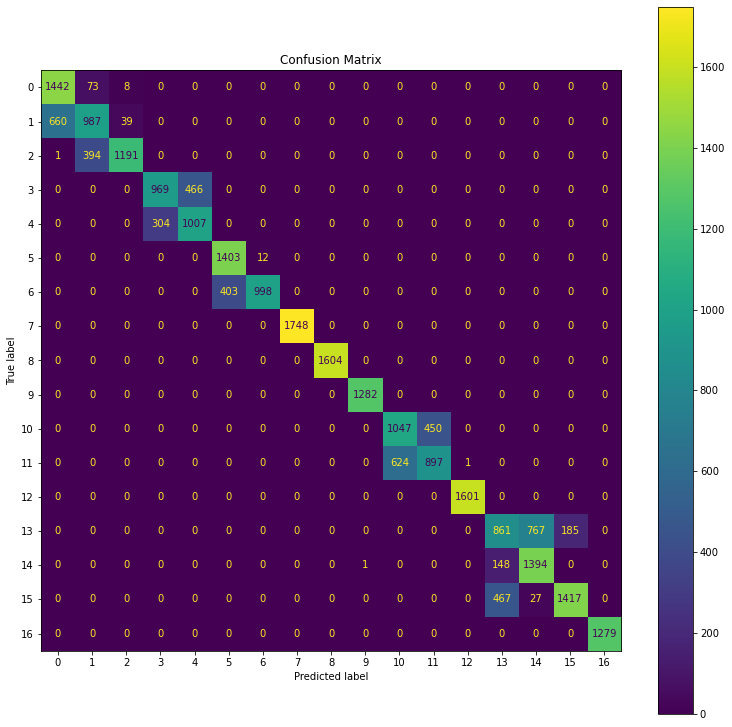

In [20]:
cm = confusion_matrix(y_location_test, CBC_location_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");